In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path=r"C:\Users\hp\Desktop\EXCELR ASSIGNMENTS\Multi Linear Regression\ToyotaCorolla.csv"
names=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
df1=pd.read_csv(path,encoding='ISO-8859-1',usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [3]:
df1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


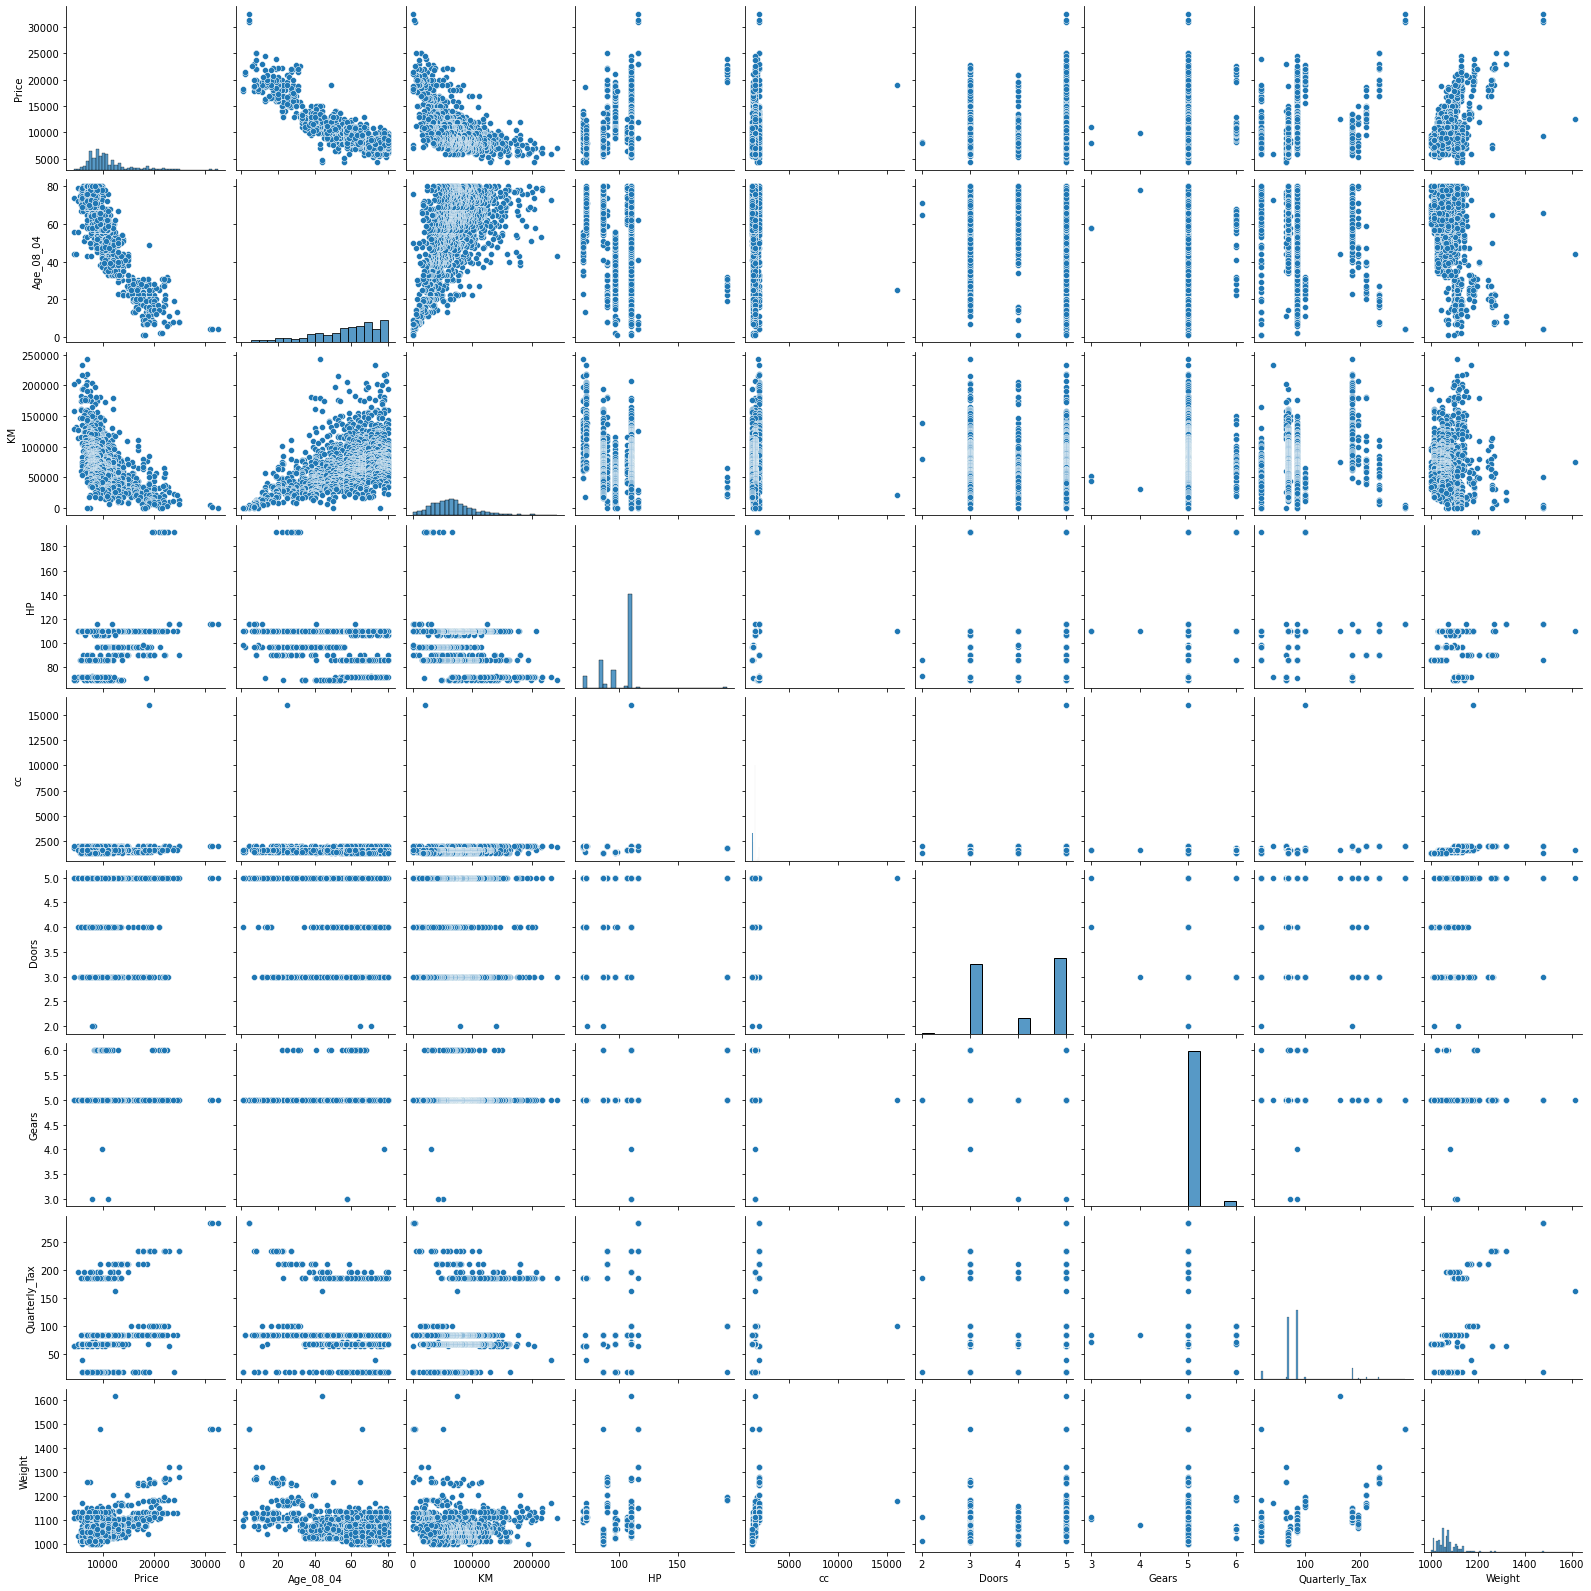

In [6]:
sns.pairplot(df1)

<AxesSubplot:>

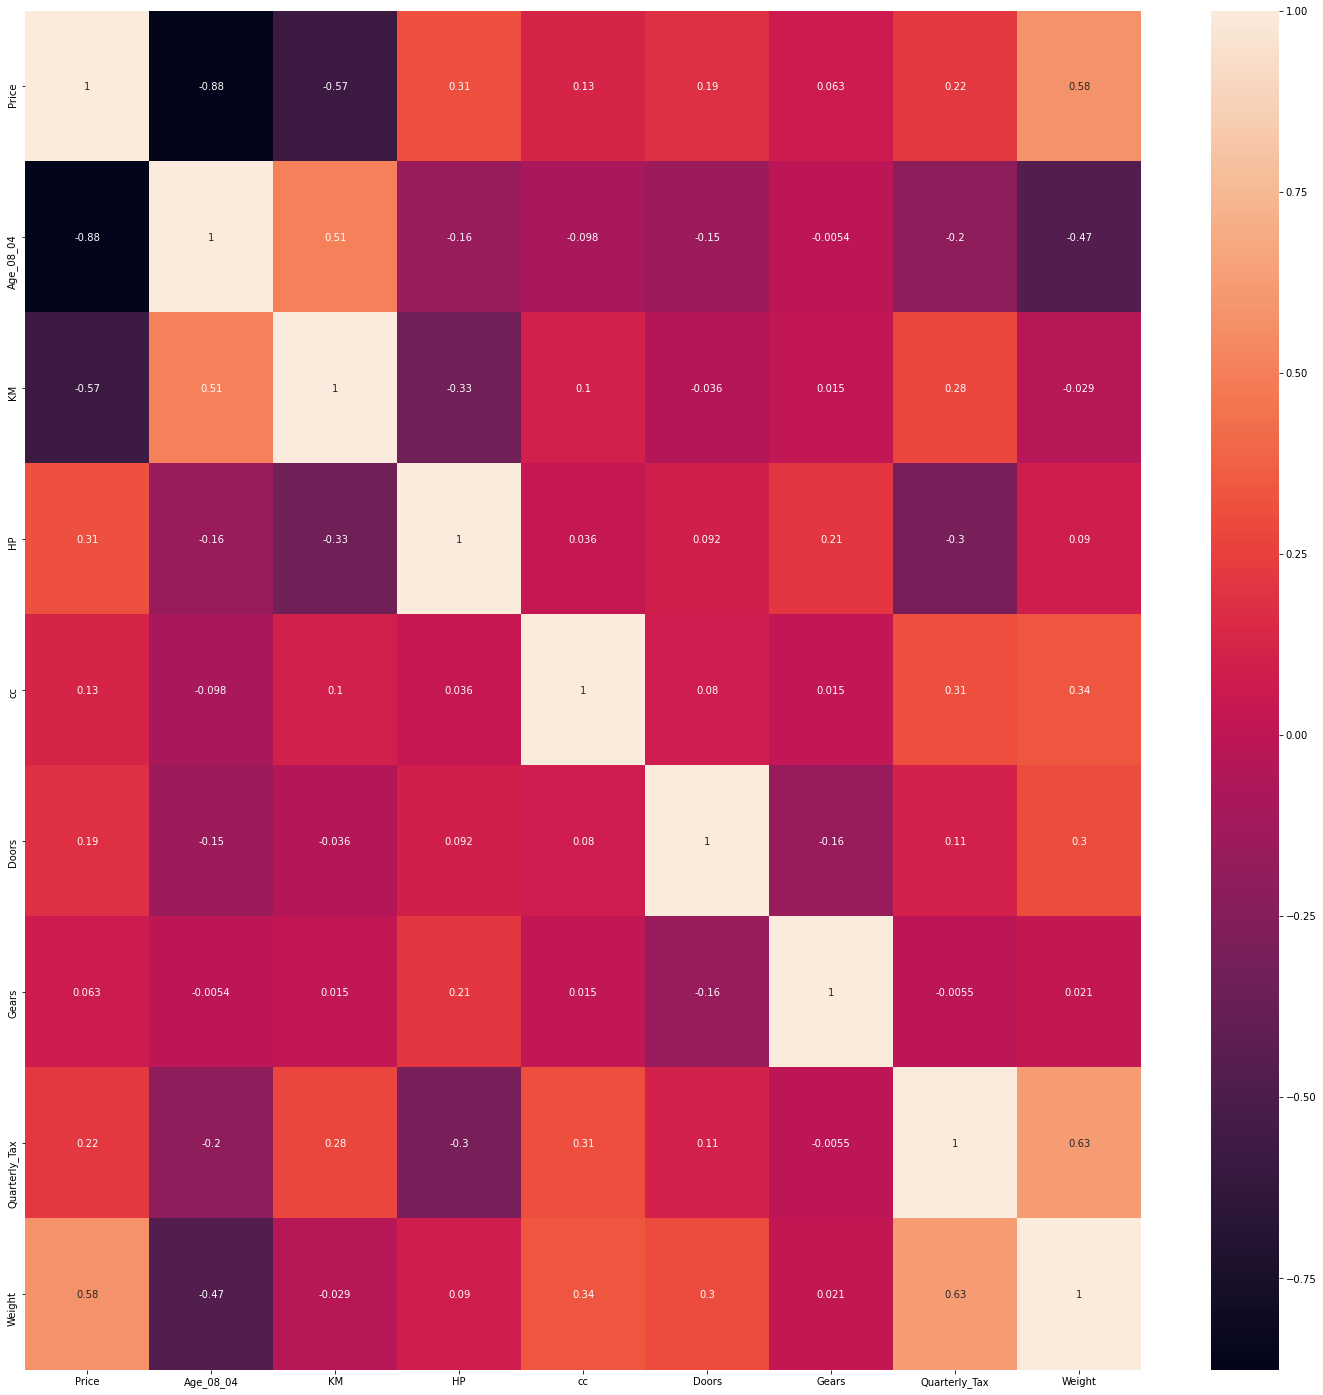

In [7]:
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(),annot=True)

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.tests import test_influence

In [9]:
df1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [10]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()

In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:42:55   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949

In [12]:
print(model.params)

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64


In [13]:
print(model.rsquared,'\n',model.rsquared_adj)

0.8637627463428191 
 0.8629989775766962


In [14]:
print(model.pvalues,'\n',model.tvalues)

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64 
 Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64


In [15]:
df1[df1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [16]:
df2=df1.drop_duplicates().reset_index(drop=True)

In [17]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [18]:
df2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [19]:
df2.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [21]:
df2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [22]:
df2.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


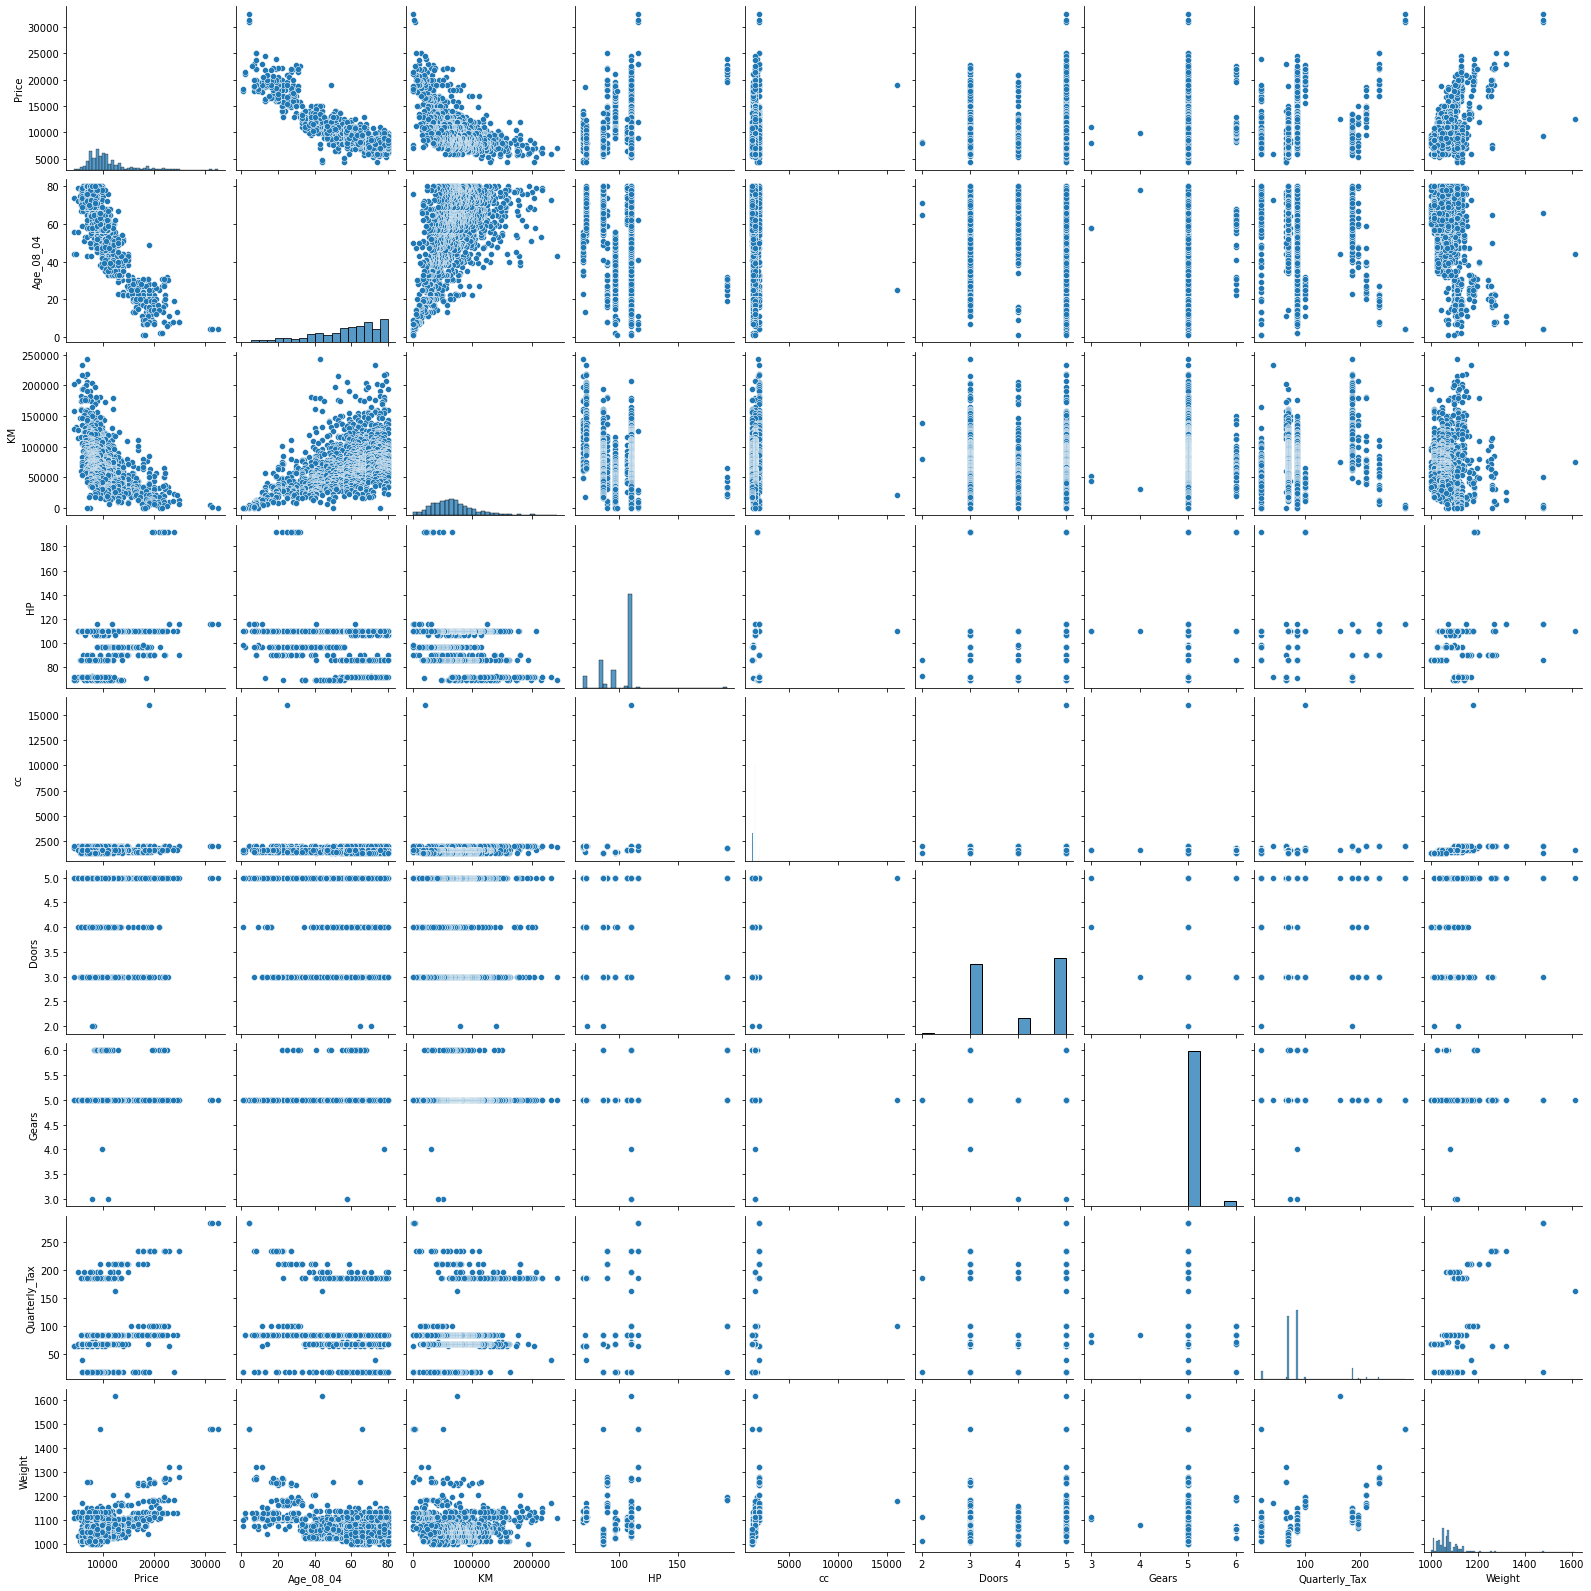

In [23]:
sns.pairplot(df2)

<AxesSubplot:>

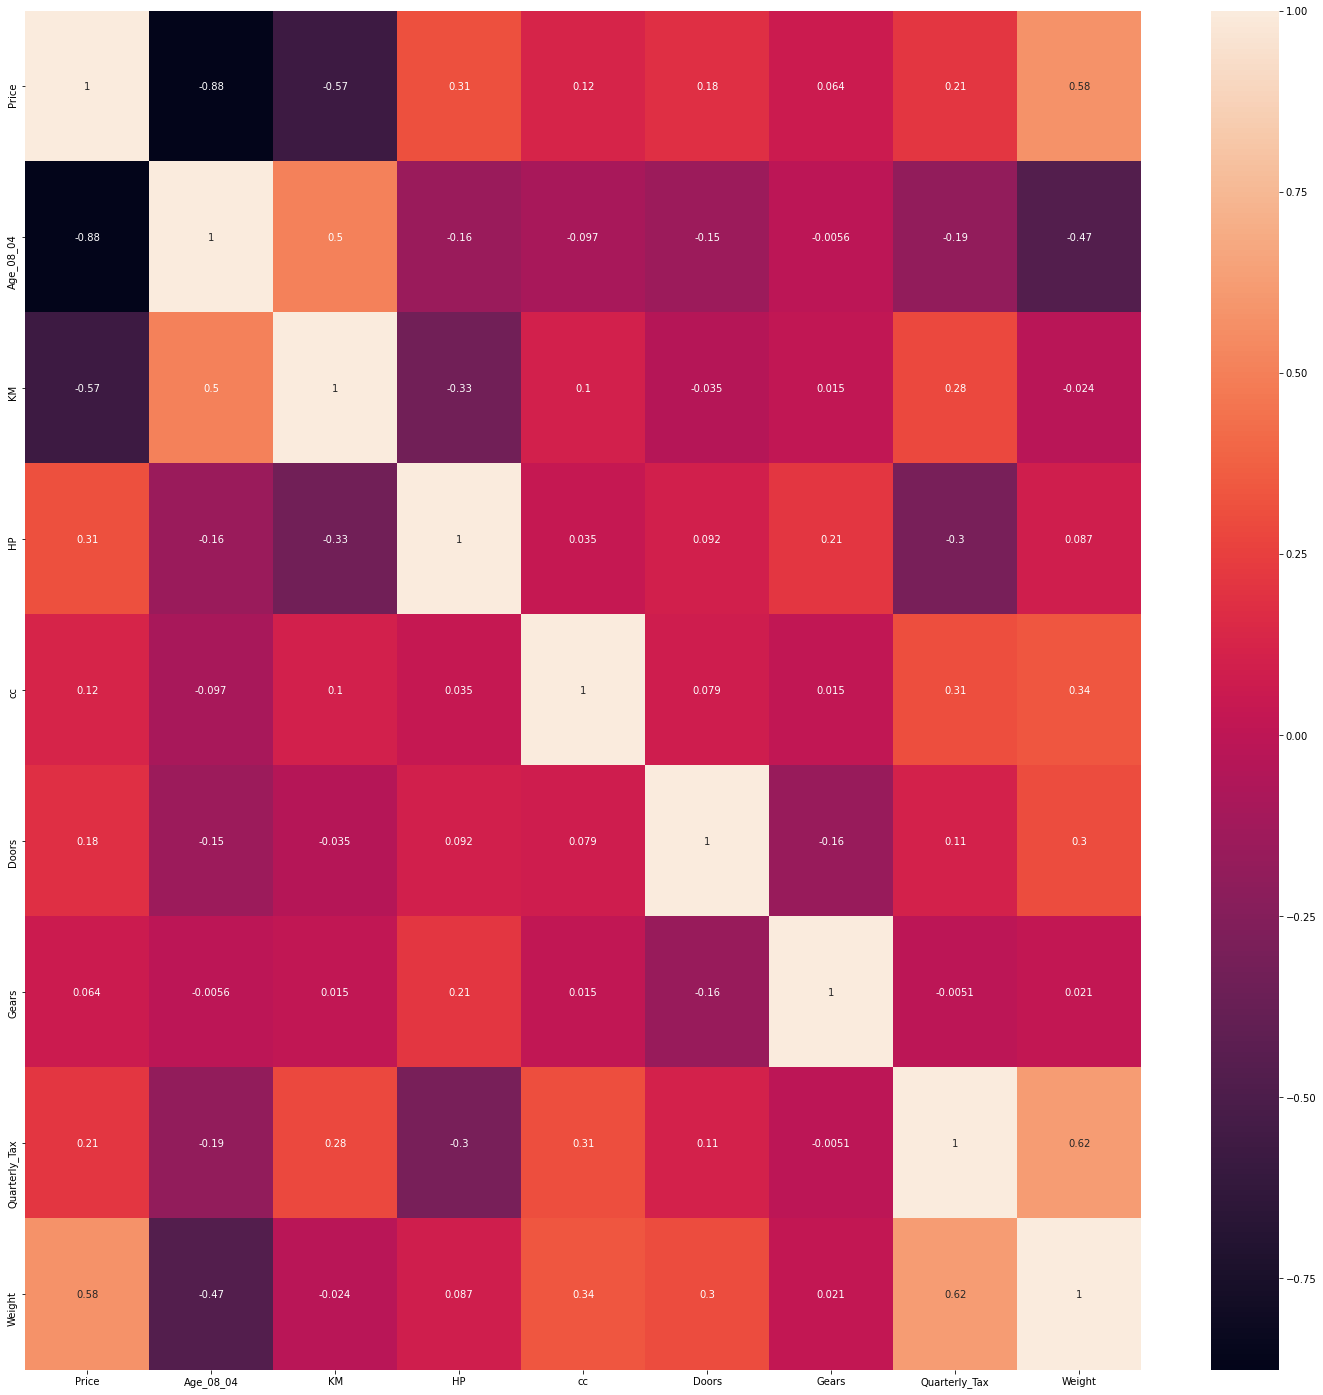

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(df2.corr(),annot=True)

In [25]:
df2.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [26]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df2).fit()

In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:43:29   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875

In [28]:
print(model.params)

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64


In [29]:
print(model.rsquared,'\t',model.rsquared_adj)

0.8625200256947001 	 0.8617487495415147


In [30]:
print(model.pvalues,'\n',model.tvalues)

Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64 
 Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64


# Vif:

In [31]:
vif=pd.DataFrame()

In [32]:
vif['vif_values']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]

In [33]:
vif

,vif_values
0,70.862202
1,46.606327
2,9.003629
3,71.409893
4,17.215428
5,21.875191
6,438.717651
7,11.194050
8,668.521609


In [34]:
vif['vif_features']=df2.columns

In [35]:
vif

,vif_values,vif_features
0,70.862202,Price
1,46.606327,Age_08_04
2,9.003629,KM
3,71.409893,HP
4,17.215428,cc
5,21.875191,Doors
6,438.717651,Gears
7,11.194050,Quarterly_Tax
8,668.521609,Weight


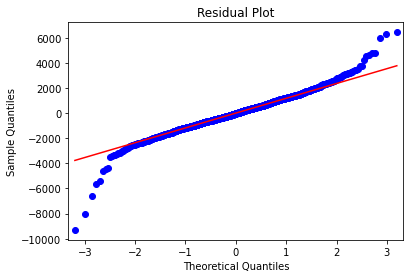

In [36]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Residual Plot")
plt.show()

In [37]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [38]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [39]:
def Standard_values(x):
    return (x-x.mean()/x.std())

Text(0.5, 1.0, 'Residual Plot')

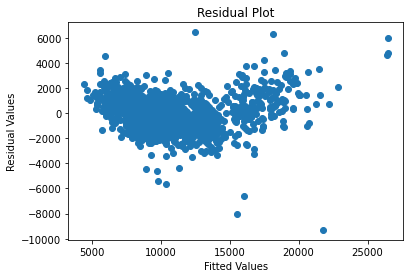

In [40]:
plt.scatter(Standard_values(model.fittedvalues),Standard_values(model.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.title('Residual Plot')

In [41]:
df2.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

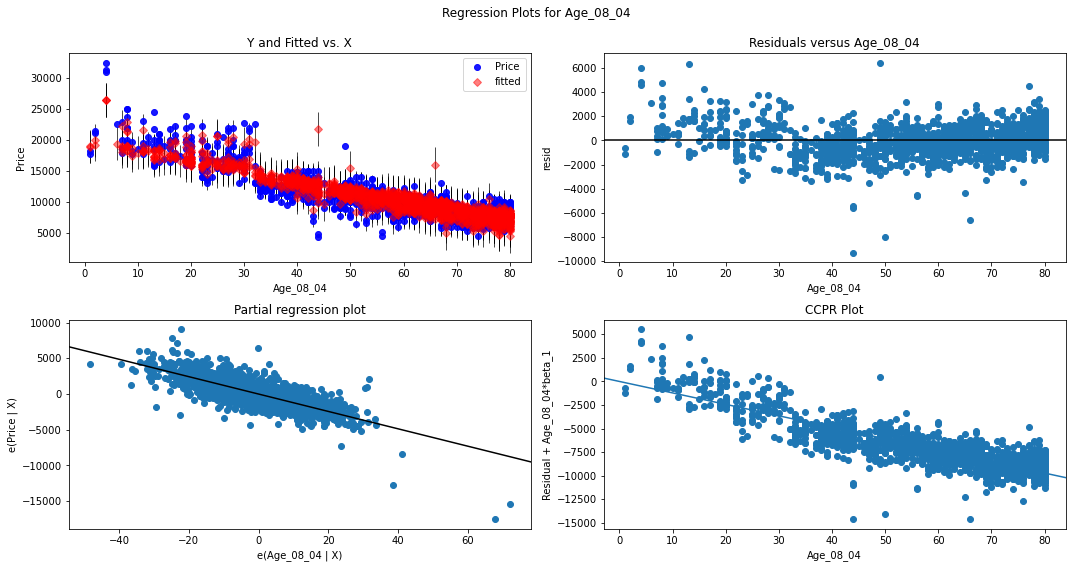

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age_08_04',fig)
plt.show()

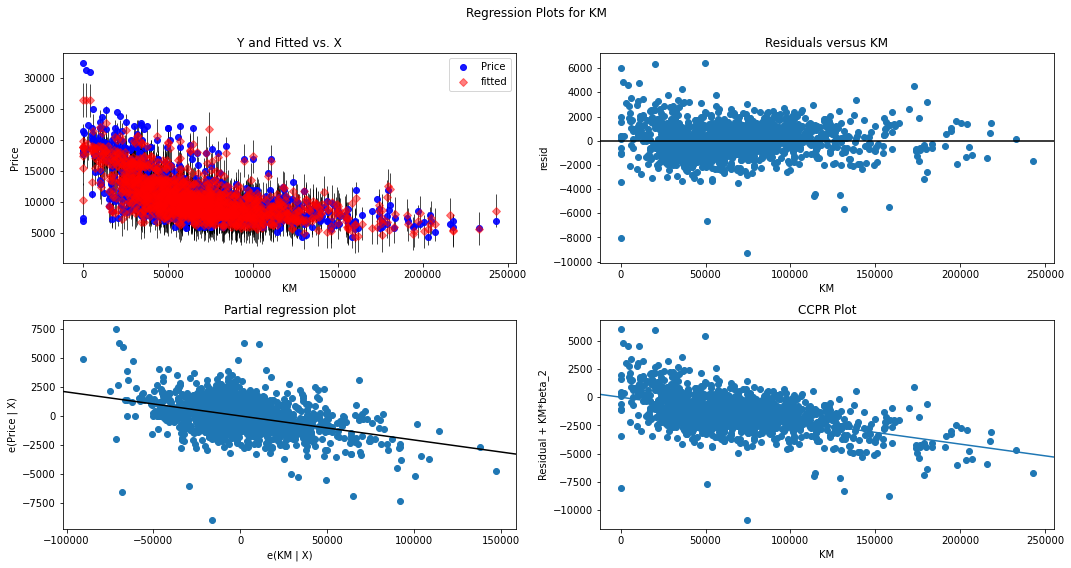

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig)
plt.show()

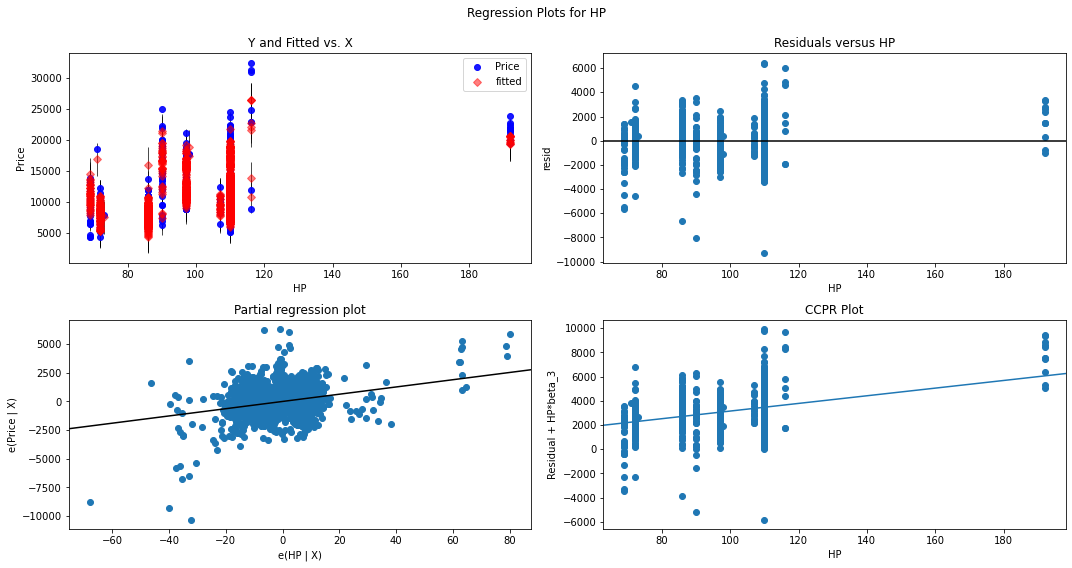

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig)
plt.show()

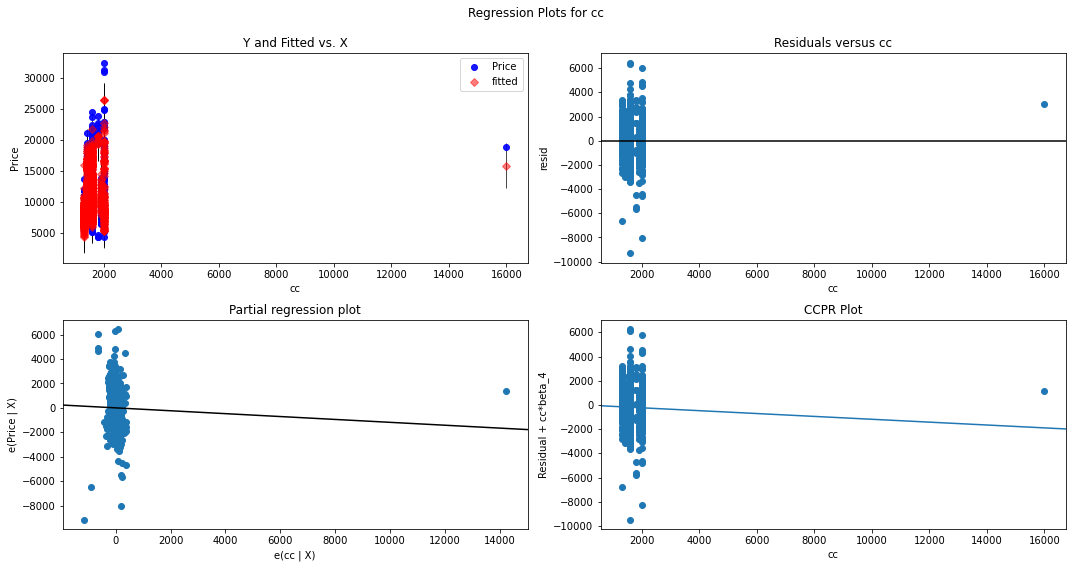

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig)
plt.show()

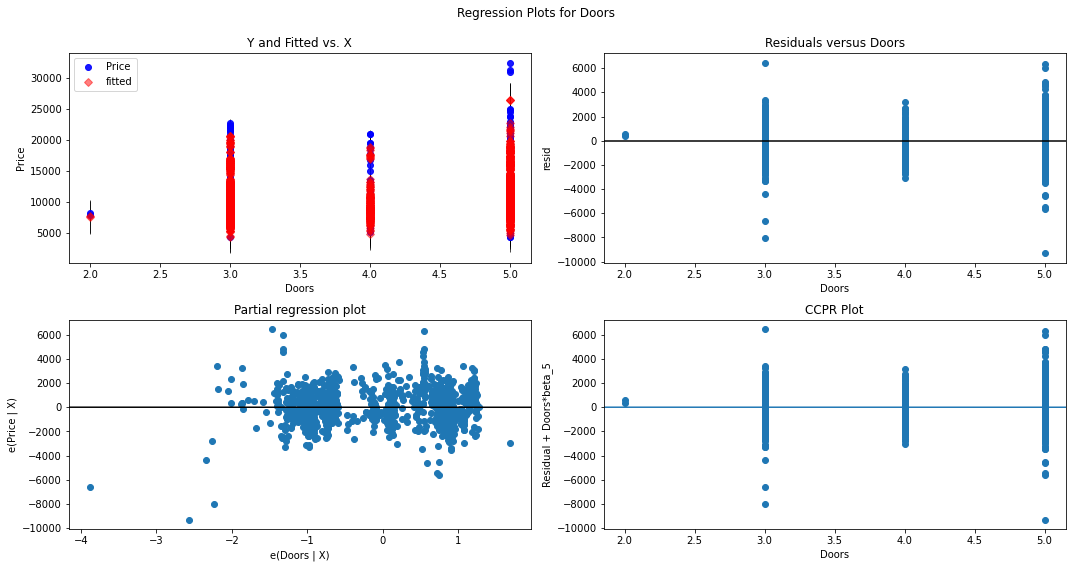

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig)
plt.show()

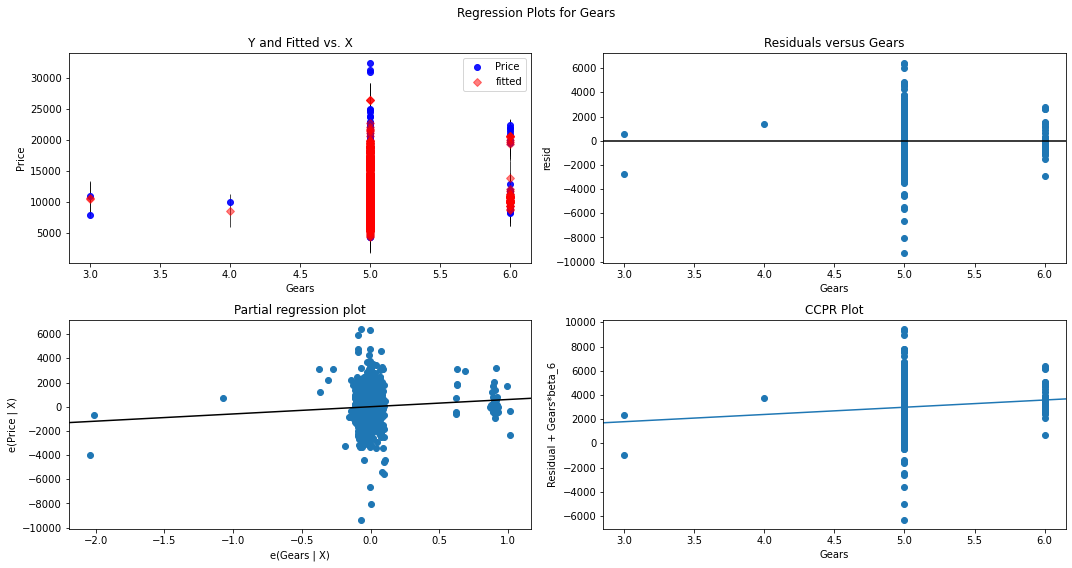

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig)
plt.show()

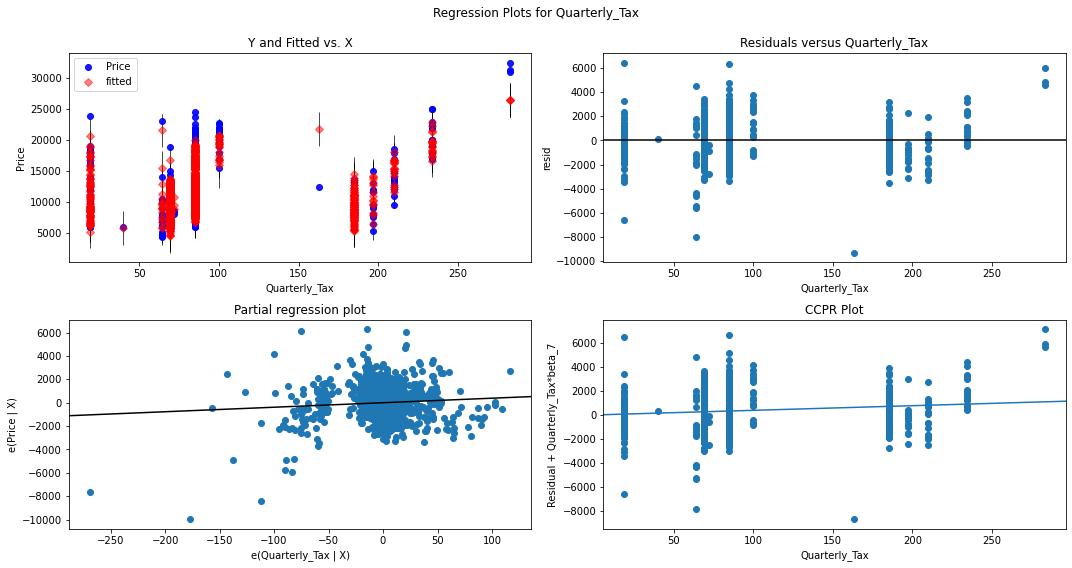

In [48]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig)
plt.show()

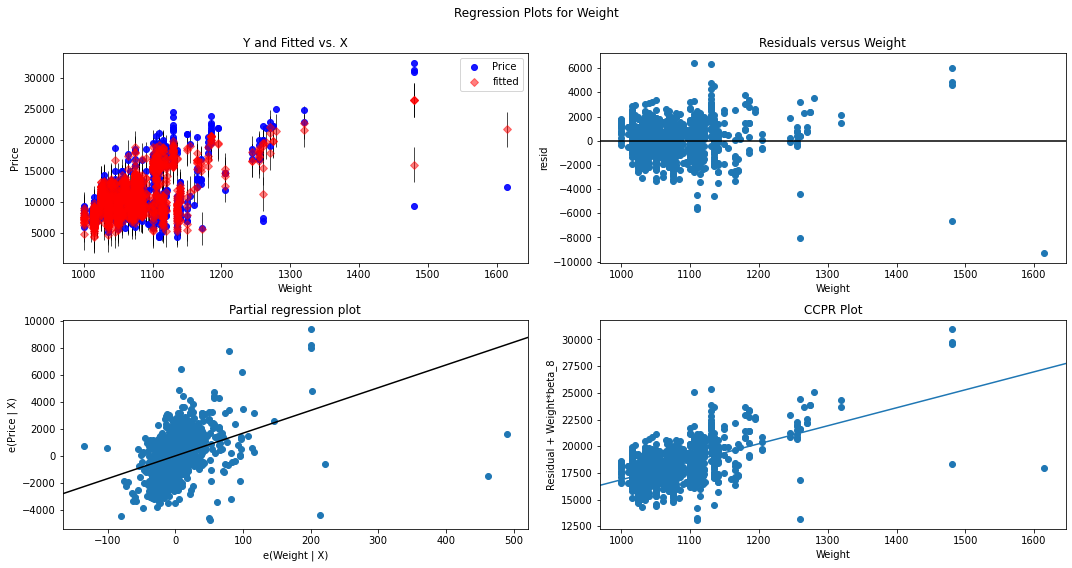

In [49]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig)
plt.show()

In [50]:
model_influence=model.get_influence()

In [51]:
(c,_)=model_influence.cooks_distance

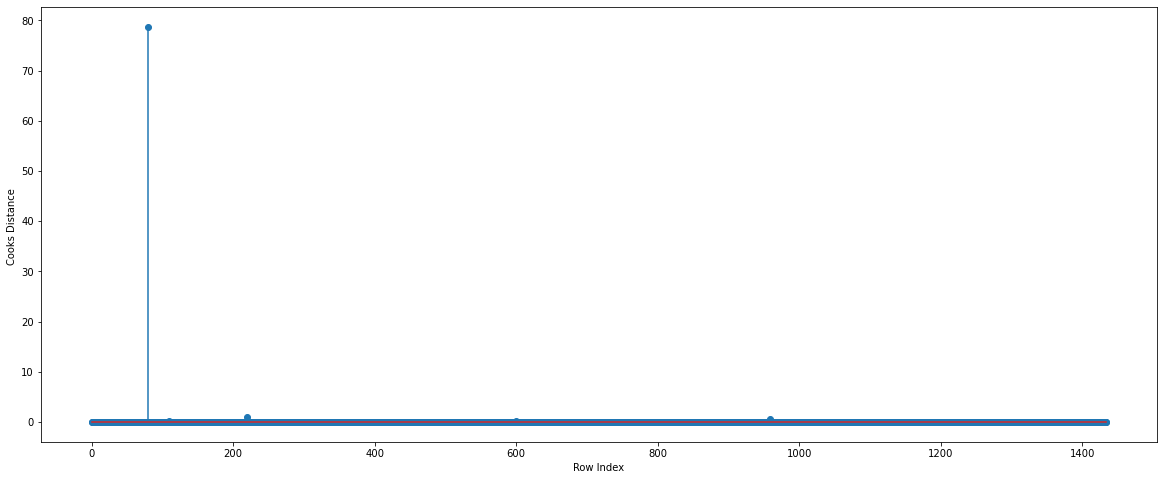

In [52]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(df2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance ')
plt.show()

In [53]:
(np.argmax(c),np.max(c))

(80, 78.72950582258598)

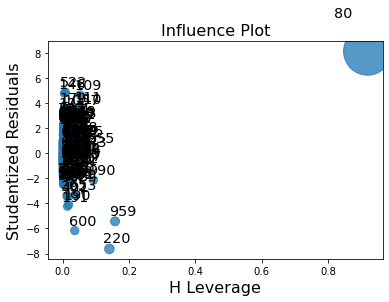

In [54]:
influence_plot(model)
plt.show()

In [55]:
k=df2.shape[1]
n=df2.shape[0]
leverage_cutoff=3*((k+1)/n)

In [56]:
leverage_cutoff

0.020905923344947737

In [57]:
df2[df2.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [58]:
df3=df2.drop(df2.index[80],axis=0).reset_index(drop=True)

In [59]:
df3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [60]:
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df3).fit()

In [61]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:43:53   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6197.9334   1383.989     -4.478

In [62]:
model_influence1=model1.get_influence()

(c,_)=model_influence1.cooks_distance

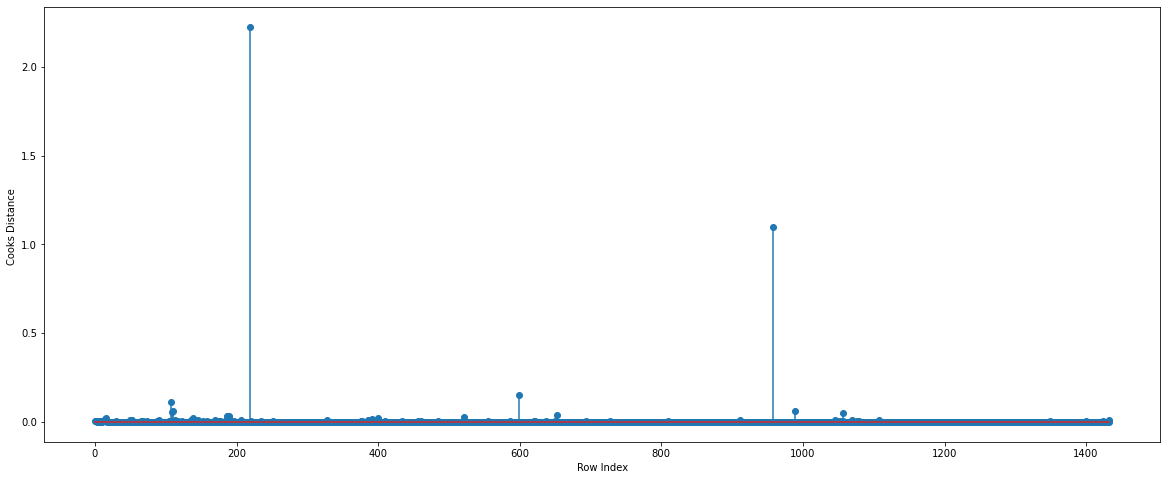

In [63]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(df3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance ')
plt.show()

In [64]:
(np.argmax(c),np.max(c))

(219, 2.2253513655271346)

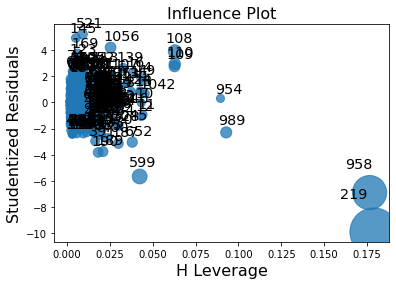

In [65]:
influence_plot(model1)
plt.show()

In [69]:
while model.rsquared < 0.95:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df3).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df3=df3.drop(df3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df3
    else:
        final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df3).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9006036780325748
Thus model accuracy is improved to 0.9008191045373194
Thus model accuracy is improved to 0.9009504142592285
Thus model accuracy is improved to 0.901205990178591
Thus model accuracy is improved to 0.9016814300215347
Thus model accuracy is improved to 0.9018233966473432
Thus model accuracy is improved to 0.9018949340497624
Thus model accuracy is improved to 0.902206189269628
Thus model accuracy is improved to 0.9023406289139221
Thus model accuracy is improved to 0.9024948455853316
Thus model accuracy is improved to 0.902745911476259
Thus model accuracy is improved to 0.902923492528442
Thus model accuracy is improved to 0.9028124260179899
Thus model accuracy is improved to 0.9032475826839939
Thus model accuracy is improved to 0.9034274151592341
Thus model accuracy is improved to 0.9039858159055305
Thus model accuracy is improved to 0.9040706187046039
Thus model accuracy is improved to 0.904094155037075
Thus model accuracy is improved t

Thus model accuracy is improved to 0.8987704612943251
Thus model accuracy is improved to 0.8982447995237359
Thus model accuracy is improved to 0.8979053950739108
Thus model accuracy is improved to 0.8981076964021313
Thus model accuracy is improved to 0.8977128720184403
Thus model accuracy is improved to 0.89693717392236
Thus model accuracy is improved to 0.897135842843044
Thus model accuracy is improved to 0.8974643865255132
Thus model accuracy is improved to 0.8978725569055335
Thus model accuracy is improved to 0.8981273289905369
Thus model accuracy is improved to 0.8982162697808788
Thus model accuracy is improved to 0.8983819776251187
Thus model accuracy is improved to 0.8985439487246372
Thus model accuracy is improved to 0.8984601660201734
Thus model accuracy is improved to 0.8990243103989226
Thus model accuracy is improved to 0.8993816138317188
Thus model accuracy is improved to 0.8991097684854648
Thus model accuracy is improved to 0.8995724732386001
Thus model accuracy is improved

Thus model accuracy is improved to 0.9162096292123788
Thus model accuracy is improved to 0.9164737777110928
Thus model accuracy is improved to 0.9165815444849241
Thus model accuracy is improved to 0.9166756808429182
Thus model accuracy is improved to 0.9163940510644075
Thus model accuracy is improved to 0.9166525561497156
Thus model accuracy is improved to 0.91699995274741
Thus model accuracy is improved to 0.9172461491261417
Thus model accuracy is improved to 0.9175154685957401
Thus model accuracy is improved to 0.9179632255943941
Thus model accuracy is improved to 0.9182756801065203
Thus model accuracy is improved to 0.9185129134896621
Thus model accuracy is improved to 0.9186994354219591
Thus model accuracy is improved to 0.9187358316718905
Thus model accuracy is improved to 0.9187504472358117
Thus model accuracy is improved to 0.9192050743707949
Thus model accuracy is improved to 0.919507454671336
Thus model accuracy is improved to 0.9196419818176228
Thus model accuracy is improved

Thus model accuracy is improved to 0.9374626452968656
Thus model accuracy is improved to 0.9379797942396487
Thus model accuracy is improved to 0.9380013439613862
Thus model accuracy is improved to 0.9381351107038409
Thus model accuracy is improved to 0.9382364605840718
Thus model accuracy is improved to 0.9383256262019041
Thus model accuracy is improved to 0.9386108377337221
Thus model accuracy is improved to 0.9388500887518978
Thus model accuracy is improved to 0.939047233058102
Thus model accuracy is improved to 0.9395438684440239
Thus model accuracy is improved to 0.9396784481018005
Thus model accuracy is improved to 0.9399208895098309
Thus model accuracy is improved to 0.9400715090363138
Thus model accuracy is improved to 0.9407336445766281
Thus model accuracy is improved to 0.9409343770371292
Thus model accuracy is improved to 0.9408724313571805
Thus model accuracy is improved to 0.9410010072100853
Thus model accuracy is improved to 0.9410442927318882
Thus model accuracy is improv

In [71]:
print(model.rsquared,'\t',model.rsquared_adj)

0.9500977741920078 	 0.9495937113050584
